<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/CNN_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow Code - EPOCH - 10

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomFlip, RandomZoom

# 1. Define Data Augmentation as Keras Layers
augmentation_layers = tf.keras.Sequential([
    RandomRotation(factor=0.2),
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    RandomFlip(mode="horizontal"),
    RandomZoom(height_factor=0.2, width_factor=0.2),
], name="augmentation")

# 2. Define the model architecture using Input layer
input_tensor = Input(shape=(32, 32, 3))
x = augmentation_layers(input_tensor)  # Apply augmentation directly to the input
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 5. Preprocess the data (scaling only)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 6. Create tf.data Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)

# 7. Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# 8. Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 59ms/step - accuracy: 0.2462 - loss: 2.0186 - val_accuracy: 0.3776 - val_loss: 1.7100
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.3621 - loss: 1.7603 - val_accuracy: 0.4174 - val_loss: 1.6777
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.3885 - loss: 1.6799 - val_accuracy: 0.4365 - val_loss: 1.5610
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4126 - loss: 1.6166 - val_accuracy: 0.4834 - val_loss: 1.4491
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4376 - loss: 1.5550 - val_accuracy: 0.4808 - val_loss: 1.4615
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4474 - loss: 1.5220 - val_accuracy: 0.4786 - val_loss: 1.4836
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 58ms/step - accuracy: 0.4657 - loss: 1.4892 - val_accuracy: 0.5393 - val_loss: 1.2834
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4779 

Add Batch Normalization

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomFlip, RandomZoom

# 1. Define Data Augmentation as Keras Layers
augmentation_layers = tf.keras.Sequential([
    RandomRotation(factor=0.2),
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    RandomFlip(mode="horizontal"),
    RandomZoom(height_factor=0.2, width_factor=0.2),
], name="augmentation")

# 2. Define the model architecture using Input layer
input_tensor = Input(shape=(32, 32, 3))
x = augmentation_layers(input_tensor)  # Apply augmentation directly to the input
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add Batch Normalization
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)  # Add Batch Normalization
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

# 3. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 5. Preprocess the data (scaling only)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 6. Create tf.data Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)

# 7. Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# 8. Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - accuracy: 0.2922 - loss: 1.9811 - val_accuracy: 0.4106 - val_loss: 1.6222
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.3905 - loss: 1.6840 - val_accuracy: 0.4352 - val_loss: 1.5847
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 79ms/step - accuracy: 0.4350 - loss: 1.5696 - val_accuracy: 0.4386 - val_loss: 1.6197
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 80ms/step - accuracy: 0.4619 - loss: 1.4911 - val_accuracy: 0.4923 - val_loss: 1.4541
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.4836 - loss: 1.4430 - val_accuracy: 0.5453 - val_loss: 1.2664
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4945 - loss: 1.4124 - val_accuracy: 0.4884 - val_loss: 1.5141
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.5084 - loss: 1.3836 - val_accuracy: 0.4909 - val_loss: 1.4566
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 

## Pytorch Code - EPOCH - 10

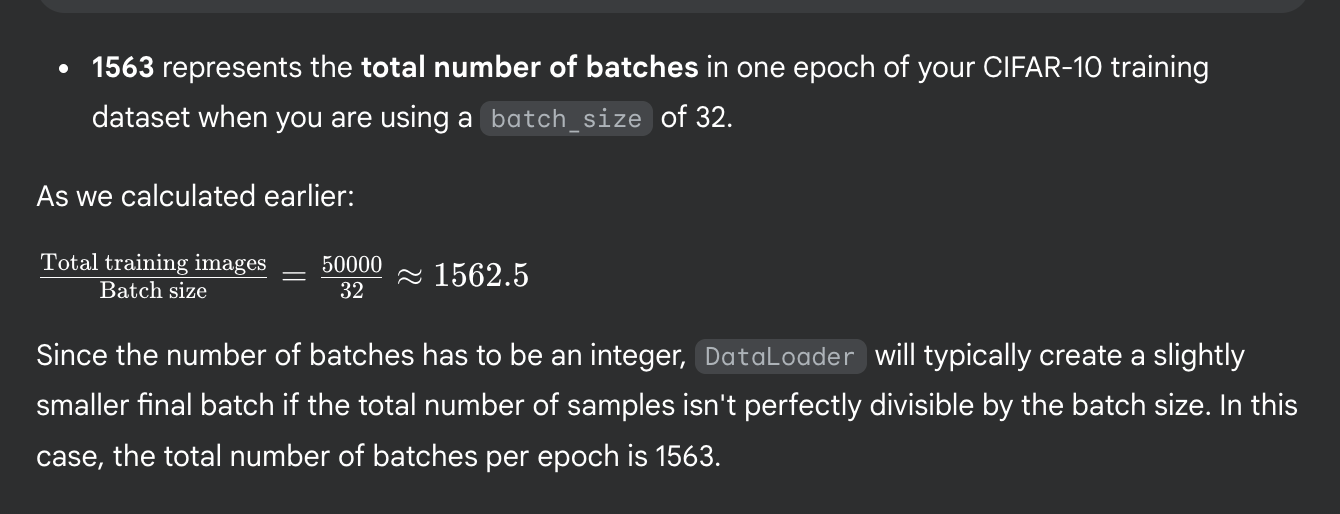



* 10000 is the number of images in the test dataset of CIFAR-10. This is the unseen data we use to evaluate the final performance of our trained model.

* 1563 (approximately) is the number of batches in one training epoch of CIFAR-10 when using a batch size of 32. This is how many times the model sees a subset of the training data during one full pass through the training set.

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

# 1. Define the model architecture with Batch Normalization
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 64)
        self.bn_fc1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.fc2(x)
        return x

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

# 2. Data Augmentation and Loading
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# 3. Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(tqdm(trainloader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False), 0):
    #for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('\n')
print('Finished Training with Batch Normalization for 10 Epochs')
print('\n')

# 5. Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network with Batch Normalization on the 10000 test images after 10 epochs: {100 * correct / total:.2f} %')



Finished Training with Batch Normalization for 10 Epochs




Accuracy of the network with Batch Normalization on the 10000 test images after 10 epochs: 77.01 %


Key Modifications:

* Number of Epochs: Changed from 10 to 30 in both TensorFlow and PyTorch.
* Learning Rate: Changed the learning rate for the Adam optimizer from the default 0.001 to 0.0001 in both
TensorFlow and PyTorch.

* These modifications aim to give the models more time to learn and potentially achieve higher accuracy. Remember that these are just starting points, and further experimentation with different values and techniques is encouraged.

## Modified TensorFlow Code - EPOCH - 30

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import RandomRotation, RandomTranslation, RandomFlip, RandomZoom

# 1. Define Data Augmentation as Keras Layers
augmentation_layers = tf.keras.Sequential([
    RandomRotation(factor=0.2),
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    RandomFlip(mode="horizontal"),
    RandomZoom(height_factor=0.2, width_factor=0.2),
], name="augmentation")

# 2. Define the model architecture using Input layer
input_tensor = Input(shape=(32, 32, 3))
x = augmentation_layers(input_tensor)  # Apply augmentation directly to the input
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

# 3. Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 5. Preprocess the data (scaling only)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 6. Create tf.data Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=len(train_images)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32)

# 7. Train the model
history = model.fit(train_dataset, epochs=30, validation_data=test_dataset)  # Adjusted epochs

# 8. Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 87ms/step - accuracy: 0.2390 - loss: 2.1737 - val_accuracy: 0.3304 - val_loss: 1.9768
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 83ms/step - accuracy: 0.3453 - loss: 1.8174 - val_accuracy: 0.3744 - val_loss: 1.8139
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.3834 - loss: 1.7246 - val_accuracy: 0.4036 - val_loss: 1.6867
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4008 - loss: 1.6651 - val_accuracy: 0.4529 - val_loss: 1.5300
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4194 - loss: 1.6229 - val_accuracy: 0.4511 - val_loss: 1.5665
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4344 - loss: 1.5789 - val_accuracy: 0.4475 - val_loss: 1.5396
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.4461 - loss: 1.5520 - val_accuracy: 0.4638 - val_loss: 1.5544
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 

## Modified PyTorch Code - EPOCH - 30

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

# 1. Define the model architecture with Batch Normalization
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 64)
        self.bn_fc1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.fc2(x)
        return x

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

# 2. Data Augmentation and Loading
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# 3. Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjusted learning rate

# 4. Train the model
num_epochs = 30  # Adjusted epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(tqdm(trainloader, desc=f"Epoch {epoch + 1}/{num_epochs}", leave=False), 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training with Batch Normalization for 30 Epochs')

# 5. Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network with Batch Normalization on the 10000 test images after 30 epochs: {100 * correct / total:.2f} %')

Finished Training with Batch Normalization for 30 Epochs


Accuracy of the network with Batch Normalization on the 10000 test images after 30 epochs: 79.38 %
